<a href="https://colab.research.google.com/github/RupeshSharma14/ML-Algorithms/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression with one variable

In [3]:
# Loading the data

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ex1data1.txt", header = None, names = ["Population", "Profit"])

m = len(data) # number of training examples
X = np.c_[np.ones((m, 1)), np.array(data["Population"])] # Add x0, a vector of 1s, to X 
y = np.array(data["Profit"]).reshape(m ,1) 

data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


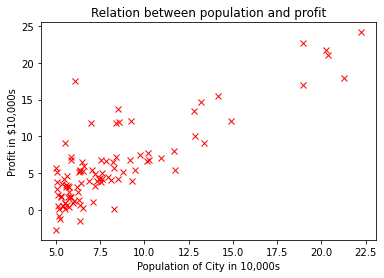

In [4]:
# Ploting the data

plt.plot(data["Population"], data["Profit"], "rx")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Relation between population and profit");

In [5]:
def cost(X, y, theta):
    """ Computes the cost of using theta as the parameter for linear regression to fit the data in X and y. """
    m = len(y)
#     return (1 / (2 * m)) * (X @ theta - y).transpose().dot(X @ theta - y) # vector form
    return (1 / (2 * m)) * np.sum(np.square((X @ theta) - y)) # operator @ is used for matrix-vector multiplication

In [6]:
initial_theta = np.zeros((2, 1))
cost(X, y, initial_theta)

32.072733877455676

In [7]:
def gradient_descent(X, y, theta, alpha, iterations):
    """ Performs gradient descent to learn theta. 
    Returns the found value for theta and the history of the cost function.
    """
    
    m = len(y)
    J_history = np.zeros((iterations, 1))
    for iter in range(iterations):
        temp0 = theta[0] - (alpha / m) * np.sum((X @ theta) - y).transpose()  
        temp1 = theta[1] - (alpha / m) * np.sum((X @ theta - y).transpose() @ X[:, 1:])
    
        theta[0] = temp0
        theta[1] = temp1
    
        J_history[iter] = cost(X, y, theta)
    
    return theta, J_history

In [8]:
alpha = 0.01
iterations = 1500

theta, J_history = gradient_descent(X, y, initial_theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

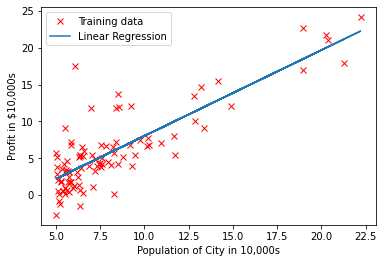

In [9]:
# Plotting the regression line

plt.plot(X[:, 1], y, 'rx')
plt.plot(X[:, 1], X @ theta) # can also use X.dot(theta) for element-wise multiplication
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Training data", "Linear Regression"]);

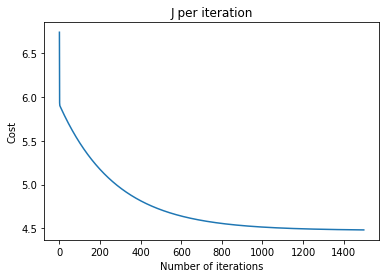

In [10]:
# Visualizing cost function

plt.plot(J_history);
plt.title("J per iteration");
plt.xlabel("Number of iterations")
plt.ylabel("Cost");

In [11]:
## Making prediction using the model

prediction = theta.T.dot(np.array([1, 3.5])) * 10000
print('In a city with a population of 35000, we predict a profit of ${}'.format(np.round(prediction[0], 2)))

In a city with a population of 35000, we predict a profit of $4519.77


## Multivariate Linear Regression

In [12]:
# Loading the data

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ex1data2.txt", header = None, names = ["Size", "Bedrooms", "Price"])
m = len(data)
X = np.c_[np.ones((m, 1)), np.array(data[["Size", "Bedrooms"]])] # add x0, vectors of 1
y = np.array(data['Price']).reshape(m,1)

data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [13]:
# Z-score scaling

def normalize(X):
    X_ = X.transpose()
    mu = np.zeros(len(X_))
    sigma = np.zeros(len(X_))
    for i, feature in enumerate(X_):
        if i == 0: 
            continue
        mu_ = np.mean(feature)
        sigma_ = np.std(feature)
        mu[i] = mu_
        sigma[i] = sigma_
        X[:, i] = (feature - mu_) / sigma_
        
    return X, mu, sigma

X, mu, sigma = normalize(X)
X[0:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [14]:
# Gradient descent

def gradient_descent_multiple(X, y, alpha, theta, iterations):
    m = len(y)
    J_history = np.zeros((iterations, 1))
    for iter in range(iterations):
        theta = theta - (alpha / m) * X.transpose() @ ((X @ theta) - y) # vector-form
        
        J_history[iter] = cost(X, y, theta)
        
    return theta, J_history 

alpha = 0.01
iterations = 1500
initial_theta = np.zeros((3, 1))
theta, J_history = gradient_descent_multiple(X, y, alpha, initial_theta, iterations)
theta

array([[340412.56301439],
       [109370.05670466],
       [ -6500.61509507]])

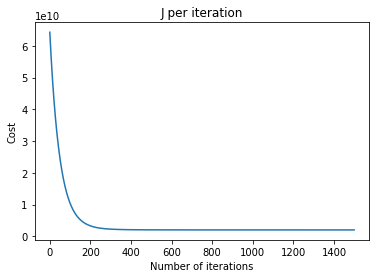

In [15]:
# Visualizing cost function

plt.plot(J_history);
plt.title("J per iteration");
plt.xlabel("Number of iterations")
plt.ylabel("Cost");

In [16]:
# Making prediction using the model

prediction = theta.T.dot(np.array([1, (1650-mu[1])/sigma[1], (3-mu[2])/sigma[2]])) 
print('In a house of 1650 square feet with 3 rooms, we predict a price of ${}'.format(np.round(prediction[0], 2)))

In a house of 1650 square feet with 3 rooms, we predict a price of $293098.47


In [17]:
# Using Normal Equation

theta = np.linalg.inv((X.T @ X)) @ X.T @ y
theta

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

In [18]:
# Making prediction using the model

prediction = theta.T.dot(np.array([1, (1650-mu[1])/sigma[1], (3-mu[2])/sigma[2]])) 
print('In a house of 1650 square feet with 3 rooms, we predict a price of ${}'.format(np.round(prediction[0], 2)))

In a house of 1650 square feet with 3 rooms, we predict a price of $293081.46


In [19]:
# Using scikit-learn 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([340412.65957447]),
 array([[     0.        , 109447.79646964,  -6578.35485416]]))

In [20]:
# Making prediction using the model

X_new = np.array([1, (1650-mu[1])/sigma[1], (3-mu[2])/sigma[2]])
X_new = X_new.reshape(1, -1)  # For scikit-learn input feature should be a 2-D array
prediction = lin_reg.predict(X_new) 
print('In a house of 1650 square feet with 3 rooms, we predict a price of ${}'.format(np.round(prediction[0, 0], 2)))

In a house of 1650 square feet with 3 rooms, we predict a price of $293081.46


## Polynomial Regression

In [21]:
# Generating non-linear data based on a quadratic equation

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

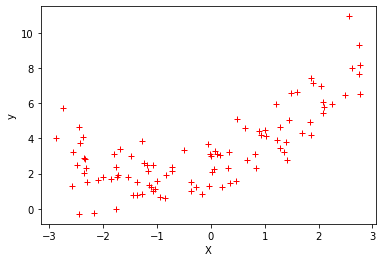

In [22]:
# Visualizing the non-linear data

plt.plot(X, y, "r+")
plt.xlabel("X")
plt.ylabel("y");

In [23]:
# Computing Polynomial features

def polynomial_features(X, degrees):
  t = X.copy()
  for i in degrees:
    X = np.append(X, t ** degrees, axis = 1)
  return X


X_poly = polynomial_features(X, [2]) # degrees = 2
print(X[0])
print(X_poly[0])

[0.93746587]
[0.93746587 0.87884225]


In [24]:
# Computing theta using Gradient descent

alpha = 0.03
iterations = 500
initial_theta = np.zeros((3, 1))
X_poly = np.c_[np.ones((m, 1)), X_poly]   # add x0, vectors of 1
theta, J_history = gradient_descent_multiple(X_poly, y, alpha, initial_theta, iterations)
theta

array([[2.28787276],
       [0.97646407],
       [0.45671796]])

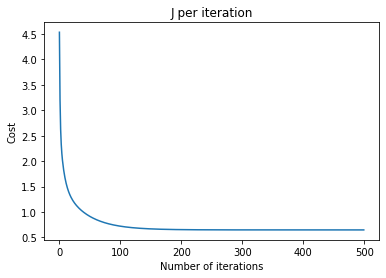

In [25]:
# Cost Function

plt.plot(J_history);
plt.title("J per iteration");
plt.xlabel("Number of iterations")
plt.ylabel("Cost");

In [26]:
# Generated new set X for prediction

X_new = np.linspace(-3, 3, 100).reshape(100, 1) 

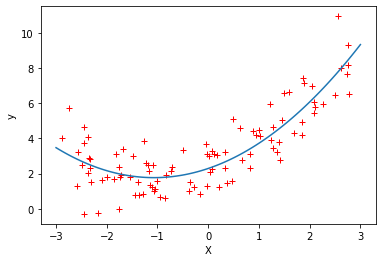

In [27]:
# Visualization of the polynomial model

X_new_poly = polynomial_features(X_new, [2])
X_new_poly = np.c_[np.ones((m, 1)), X_new_poly] # add x0, vectors of 1
plt.plot(X, y, "r+")
plt.plot(X_new, X_new_poly @ theta)
plt.xlabel("X")
plt.ylabel("y");

In [28]:
# Using scikit-learn to compute polynomial features

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.93746587]
[0.93746587 0.87884225]


In [29]:
# Using Linear Regression() to fit our data 

lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.29119646]), array([[0.97649157, 0.45600128]]))

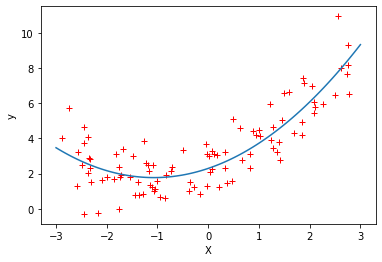

In [30]:
# Visualization of Polynomial Regression


X_new_poly = poly_features.transform(X_new)
plt.plot(X, y, "r+")
plt.plot(X_new, lin_reg.predict(X_new_poly))
plt.xlabel("X")
plt.ylabel("y");